In [37]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.DataFrame(sns.load_dataset("anscombe"))

In [39]:
df.info

<bound method DataFrame.info of    dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      

In [40]:
df.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

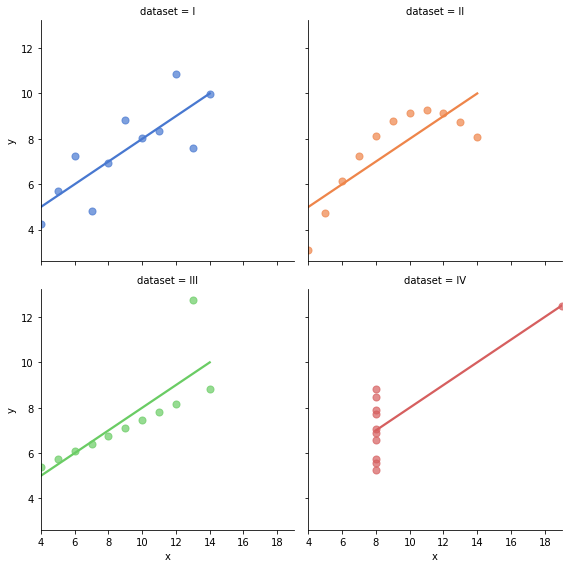

In [41]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 0.7})

In [42]:
df = pd.read_csv("all_penguins_clean.csv", index_col=0)
df.dropna(inplace=True)
df.shape

(334, 14)

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

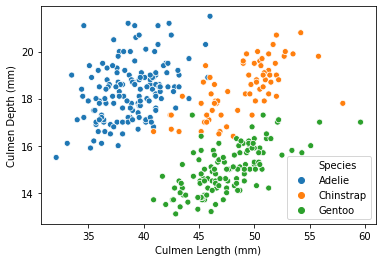

In [43]:
sns.scatterplot(df['Culmen Length (mm)'], df["Culmen Depth (mm)"], hue=df["Species"])

In [61]:
X = df[["Culmen Length (mm)"]].loc[df['Species']=="Gentoo"]
y = df[["Culmen Depth (mm)"]].loc[df['Species']=="Gentoo"]

In [62]:
X.shape, y.shape

((120, 1), (120, 1))

# Linear Regression with Scikit learn


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Split data in test and train**

In [64]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

**Fit Linear Model**

In [65]:
lm = LinearRegression().fit(Xtrain, ytrain)

In [66]:
ypred = lm.predict(Xtest)

In [67]:
lm.score(Xtest, ytest)

0.35861572105662454

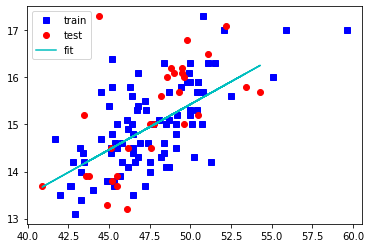

In [68]:
plt.plot(Xtrain, ytrain, 'bs', label='train')
plt.plot(Xtest, ytest, 'ro', label='test')
plt.plot(Xtest, ypred, 'c', label="fit")
plt.legend()

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [70]:
# MSE
print('Mean squared error %.2f'
% mean_squared_error (ytest, ypred))

Mean squared error 0.83
